In [3]:
import numpy as np                      # import libraries
import matplotlib.pyplot as plt
from astropy.io import fits

# reading the 3 filters
f105 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits").astype(np.float32)
f125 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits").astype(np.float32)
f160 = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits").astype(np.float32)

In [5]:
pmin = 0.5     # need each image scaled to values between 0 and 1 so they combine nicely in RGB
pmax = 99.5    # doing this by using percentiles so bright stuff shows up and extreme outliers get ignored

# F160W scale (red)
vmin160, vmax160 = np.percentile(f160[np.isfinite(f160)], [pmin, pmax])
r = (f160 - vmin160) / (vmax160 - vmin160)   # this is the part that transforms the image so that vmin and vmax are translated to 0 and 1
r = np.clip(r, 0, 1)                         # this is so that values < 0 become 0 and values > 1 become 1

# F125W scale (green)

vmin125, vmax125 = np.percentile(f125[np.isfinite(f125)], [pmin, pmax])
g = (f125 - vmin125) / (vmax125 - vmin125)
g = np.clip(g, 0, 1)

# F105W scale (blue)
vmin105, vmax105 = np.percentile(f105[np.isfinite(f105)], [pmin, pmax])
b = (f105 - vmin105) / (vmax105 - vmin105)
b = np.clip(b, 0, 1)

In [6]:
rgb = np.dstack([r, g, b]) # this stacks r, g, and b into RGB for the 3 color image

saved successfully as udf_rgb_f160_f125_f105.png


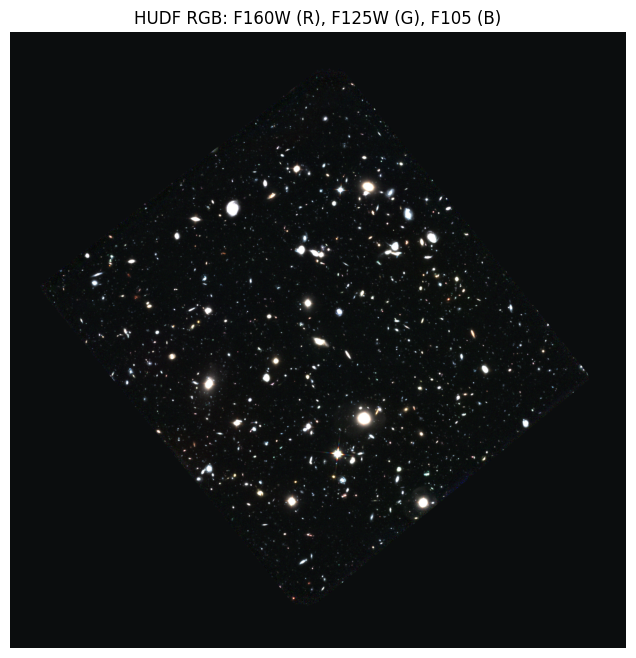

In [9]:
plt.figure(figsize=(8, 8))                        # plotting for display
plt.imshow(rgb, origin="lower")
plt.axis("off")
plt.title("HUDF RGB: F160W (R), F125W (G), F105 (B)")

plt.imsave("udf_rgb_f160_f125_f105.png", rgb)
print("saved successfully as udf_rgb_f160_f125_f105.png")